In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from statsmodels.stats import diagnostic as diag #statiscal model
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
df = pd.read_csv(r"C:\Users\rohit\Desktop\PythonCode\50_Startups.csv")

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


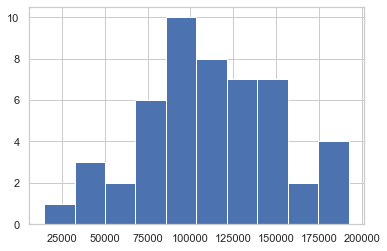

In [5]:
df.Profit.hist()
plt.show()

In [6]:
df.isnull().sum(axis = 0)

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

## Data Preprocessing
* Assign Lables to categorical data

In [49]:
df.State=(LabelEncoder().fit_transform(df.State)) # Converting Categorical data in Numerical with the help of LabelEncoder.

In [50]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


## Exploratory Data Analysis (EDA)


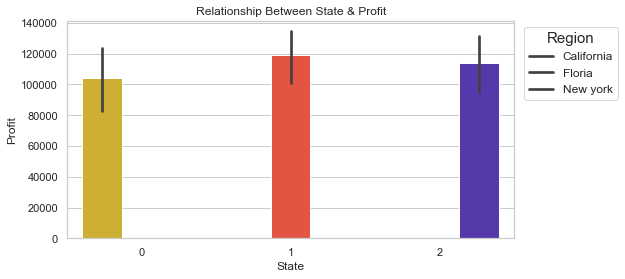

In [47]:

plt.figure(figsize = (8,4))
ax= sns.barplot(x='State', y='Profit', data=df,hue="State",palette='CMRmap_r')
ax.legend(fontsize = 12, \
               bbox_to_anchor= (1.01, 1), 
               title="Region", \
               title_fontsize = 15,labels=['California', 'Floria','New york'])
ax.set_title('Relationship Between State & Profit')
plt.show()

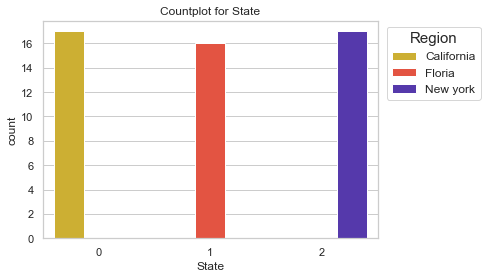

In [48]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='State', data=df, hue='State',palette='CMRmap_r')
sns.set_theme(style="whitegrid")
ax.legend(fontsize = 12, \
               bbox_to_anchor= (1.01, 1), 
               title="Region", \
               title_fontsize = 15,labels=['California', 'Floria','New york'])
ax.set_title('Countplot for State')
plt.show()

# Identify & Treatment of Outliers

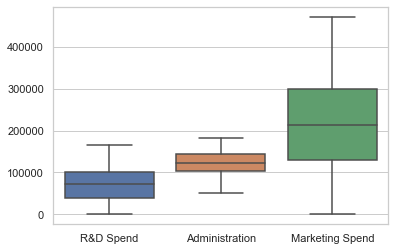

In [9]:
sns.boxplot(data=df.loc[:, ['R&D Spend', 'Administration','Marketing Spend']])
plt.show()

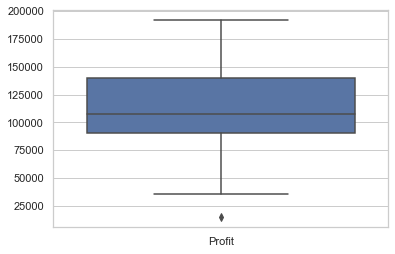

In [10]:
sns.boxplot(data=df.loc[:, ['Profit']])
plt.show()

# Treatment of Outliers
* Profit

In [11]:
q1 = df['Profit'].quantile(0.25)
q3 = df['Profit'].quantile(0.75)
iqr = q3-q1 #Interquartile range
Lower_limit  = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
Lower_limit,upper_limit

(15698.290000000023, 214206.58999999997)

In [12]:
df['Profit']=np.where(df['Profit'] < Lower_limit,Lower_limit,df['Profit']) 
# lower limit

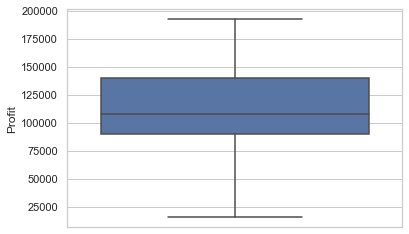

In [13]:
sns.boxplot(y='Profit',data=df)
plt.show()

# Splitting the Data

##  into Training Data & Testing


In [14]:
X = df.drop('Profit', axis=1)

In [15]:
Y = df['Profit']

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20, random_state=100)

In [17]:
print(X.shape,X_train.shape, X_test.shape)

(50, 4) (40, 4) (10, 4)


## Model Building


In [18]:
train = pd.concat([X_train,Y_train], axis=1)

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.241955,0.724248,0.104685,0.973278
Administration,0.241955,1.000000,-0.032154,0.011847,0.200885
Marketing Spend,0.724248,-0.032154,1.000000,0.077670,0.747993
State,0.104685,0.011847,0.077670,1.000000,0.101304
Profit,0.973278,0.200885,0.747993,0.101304,1.000000


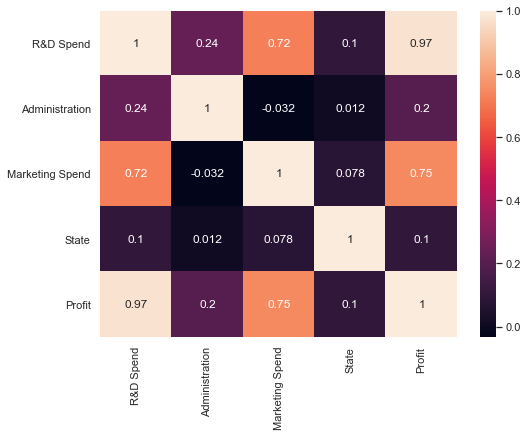

In [19]:
# calculate the correlation matrix
corr = df.corr()
# display the correlation matrix
display(corr)
plt.figure(figsize = (8,6))
# plot the correlation heatmap
sns.heatmap(corr,annot = True)
plt.show()

# Backward Elimination Method-
## Hypothesis


H0 :- There is no log linear relationship between Charges(Target) and BMI,Sex,Age,Children,Smoker & Region.
   Vs

H1 :- There is log linear relationship between Charges(Target) and BMI,Sex,Age,Children,Smoker & Region.

Alpha = 0.05

In [20]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
result=smf.ols("Profit~Q('R&D Spend')+Administration+Q('Marketing Spend')+State",data=train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     220.0
Date:                Thu, 07 Oct 2021   Prob (F-statistic):           2.81e-24
Time:                        18:59:07   Log-Likelihood:                -414.35
No. Observations:                  40   AIC:                             838.7
Df Residuals:                      35   BIC:                             847.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             5.561e+04   6979.870      7.968      0.000    4.14e+04    6.98e+04
Q('R&D Spend')           0.8168      0.046     17.810      0.000       0.724       0.910
Administration          -0.0502      0.053     -0.954      0.346      -0.157       0.057
Q('Marketing Spend')     0.0200      0.016      1.250      0.220      -0.012       0.052
State                -1439.4323   1586.366     -0.907      0.370   -4659.927    1781.062
==============================================================================
Omnibus:                        0.018   Durbin-Watson:                   2.219
Prob(Omnibus):                  0.991   Jarque-Bera (JB):                0.096
Skew:                          -0.036   Prob(JB):                        0.953
Kurtosis:                       2.771   Cond. No.                     1.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Observation 
From the summary, we observe that the highest P-value is for (State)= 0.370, which is way over our significance level of 0.05.
* Hence, we remove 'State' feature. 

* We will remove and re-run the mode

In [21]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
result=smf.ols("Profit~Q('R&D Spend')+Administration+Q('Marketing Spend')",data=train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     294.5
Date:                Thu, 07 Oct 2021   Prob (F-statistic):           2.24e-25
Time:                        18:59:07   Log-Likelihood:                -414.81
No. Observations:                  40   AIC:                             837.6
Df Residuals:                      36   BIC:                             844.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             5.368e+04   6630.124      8.096      0.000    4.02e+04    6.71e+04
Q('R&D Spend')           0.8133      0.046     17.840      0.000       0.721       0.906
Administration          -0.0459      0.052     -0.878      0.386      -0.152       0.060
Q('Marketing Spend')     0.0205      0.016      1.290      0.205      -0.012       0.053
==============================================================================
Omnibus:                        0.282   Durbin-Watson:                   2.229
Prob(Omnibus):                  0.869   Jarque-Bera (JB):                0.363
Skew:                          -0.181   Prob(JB):                        0.834
Kurtosis:                       2.706   Cond. No.                     1.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Observation 
From the summary, we observe that the highest P-value is for (Administration)= 0.386, which is way over our significance level of 0.05.
* Hence, we remove 'Administration' feature. 

* We will remove and re-run the mode

In [22]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
result=smf.ols("Profit~Q('R&D Spend')+Q('Marketing Spend')",data=train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     444.1
Date:                Thu, 07 Oct 2021   Prob (F-statistic):           1.37e-26
Time:                        18:59:07   Log-Likelihood:                -415.24
No. Observations:                  40   AIC:                             836.5
Df Residuals:                      37   BIC:                             841.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             4.838e+04   2722.534     17.769      0.000    4.29e+04    5.39e+04
Q('R&D Spend')           0.7995      0.043     18.731      0.000       0.713       0.886
Q('Marketing Spend')     0.0240      0.015      1.555      0.129      -0.007       0.055
==============================================================================
Omnibus:                        0.121   Durbin-Watson:                   2.158
Prob(Omnibus):                  0.941   Jarque-Bera (JB):                0.322
Skew:                          -0.071   Prob(JB):                        0.851
Kurtosis:                       2.584   Cond. No.                     5.66e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Observation 
From the summary, we observe that the highest P-value is for (Marketing Spend)= 0.129, which is way over our significance level of 0.05.
* Hence, we remove 'Marketing Spend' feature. 

* We will remove and re-run the mode

In [23]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
fmodel=result=smf.ols("Profit~Q('R&D Spend')",data=train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     853.9
Date:                Thu, 07 Oct 2021   Prob (F-statistic):           1.20e-27
Time:                        18:59:07   Log-Likelihood:                -416.50
No. Observations:                  40   AIC:                             837.0
Df Residuals:                      38   BIC:                             840.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.981e+04   2609.102     19.091      0.000    4.45e+04    5.51e+04
Q('R&D Spend')     0.8489      0.029     29.222      0.000       0.790       0.908
==============================================================================
Omnibus:                        0.198   Durbin-Watson:                   2.185
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.333
Skew:                          -0.146   Prob(JB):                        0.847
Kurtosis:                       2.662   Cond. No.                     1.79e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Observation 
* There is Significane relationship between Profit and R&D Spend .

#### 95% is accuracy of model , so we say model is good fit.

4.981e+04(Intercept Coefficient)
49810

Y= 49810+0.8489(R&D Spend Coefficent)*165349.20(X1)

Y= 

# Assumption of Model

* Colinearity
* Normality
* Homoscedasicity
* Model Error has to be independently identificaly Distibuted

## Multicolinearity (with the help of VIF)

In [26]:
X1=train.drop(['Profit'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 

                         for i in range(X1.shape[1])], index=X1.columns)
series_before

R&D Spend          9.728718
Administration     5.345651
Marketing Spend    8.609687
State              2.503815
dtype: float64

In [28]:
train['fitted_value']=fmodel.fittedvalues #Predicted Value
train['residual']=fmodel.resid  #Error
train.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,fitted_value,residual
0,165349.20,136897.80,471784.10,2,192261.83,190174.797479,2087.032521
11,100671.96,91790.61,249744.55,0,144259.40,135270.119067,8989.280933
18,91749.16,114175.79,294919.57,1,124266.90,127695.530780,-3428.630780
45,1000.23,124153.04,1903.93,2,64926.08,50658.526452,14267.553548
38,20229.59,65947.93,185265.10,2,81229.06,66982.380514,14246.679486


## Homoscedasicity

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


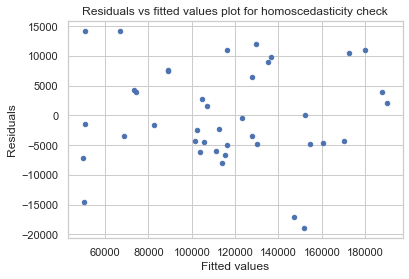

In [29]:
p = train.plot.scatter(x='fitted_value',y='residual')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')
plt.show()

## Normality

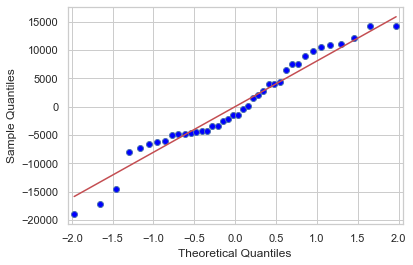

In [30]:
import pylab
# check for the normality of the residuals
sm.qqplot(fmodel.resid, line='s')
pylab.show()

## Model Error has to be independently identificaly Distibuted

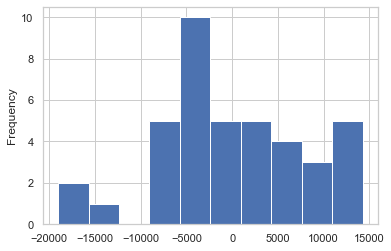

In [31]:
train['residual'].plot.hist()
plt.show()

In [75]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train,Y_train)


y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)



from sklearn.metrics import r2_score
r2_score(Y_test,y_pred_test)

0.8958239238522501

## Prediction on Test Data (unseen data)

In [52]:
test = pd.concat([X_test, Y_test], axis=1)

In [54]:
test['Prediction']=fmodel.predict(test)
test.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Prediction
6,134615.46,147198.87,127716.82,0,156122.51,164084.845108
36,28663.76,127056.21,201126.82,1,90708.19,74142.169514
37,44069.95,51283.14,197029.42,0,89949.14,87220.524550
28,66051.52,182645.56,118148.20,1,103282.38,105880.736888
43,15505.73,127382.30,35534.17,2,69758.98,62972.283389


### MSE & MAE & RMSE for evaluation of Model on train data

In [59]:
import math
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# calculate the mean squared error
model_mse = mean_squared_error(train['Profit'],train['fitted_value'])

# calulcate the root mean squared error
model_rmse = math.sqrt(model_mse)
# display the output
print("RMSE {:.3}".format(model_rmse))

RMSE 8.05e+03
